In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

Mounted at /content/drive


In [26]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_csv('/content/drive/MyDrive/lithium_pro/lith_cost4.csv')
data.head()

,Category,Output,material,Year,Recycling Throughput,Cathode Scenario,Location scenario,Type_All,Type_Direct,Type_Hydro,Type_Pyro,Location of recycling_China,Location of recycling_U.S.
0,5,2.546235,0,2020,10000,1,1,0,0,0,1,0,1
1,5,2.051076,0,2020,10000,1,1,0,0,1,0,0,1
2,5,3.488244,0,2020,10000,1,1,0,1,0,0,0,1
3,8,0.099729,9,2020,10000,1,1,0,0,0,1,0,1
4,8,0.327106,27,2020,10000,1,1,0,0,0,1,0,1


In [27]:
X = data.drop('Output', axis=1)
y = data['Output']


print(X,y)

        Category  material  Year  Recycling Throughput  Cathode Scenario  \
0              5         0  2020                 10000                 1   
1              5         0  2020                 10000                 1   
2              5         0  2020                 10000                 1   
3              8         9  2020                 10000                 1   
4              8        27  2020                 10000                 1   
...          ...       ...   ...                   ...               ...   
166279         7        33  2050                  9000                 2   
166280         7         2  2050                  9000                 2   
166281         7        28  2050                  9000                 2   
166282         7         3  2050                  9000                 2   
166283         7        19  2050                  9000                 2   

        Location scenario  Type_All  Type_Direct  Type_Hydro  Type_Pyro  \
0           

In [28]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define the number of estimators
num_estimators = 100  # You can change this to your desired number

# Create and evaluate Random Forest Regressor with a specific number of estimators
forest_model = RandomForestRegressor(n_estimators=num_estimators, random_state=42)
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)

# Calculate Metrics
mae = mean_absolute_error(y_test, forest_pred)
mse = mean_squared_error(y_test, forest_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, forest_pred)

# Fix RMSLE calculation
forest_pred = np.maximum(forest_pred, 1e-9)  # Ensure no negative values
y_test_fixed = np.maximum(y_test, 1e-9)  # Avoid zero issues
rmsle = np.sqrt(np.mean((np.log1p(forest_pred) - np.log1p(y_test_fixed)) ** 2))

# **Fix MAPE Issue** - Clip small `y_val` values
threshold = 0.1  # Adjust based on dataset range
y_val_safe = np.clip(y_val, threshold, np.max(y_val))
mape = np.mean(np.abs((y_val - y_pred) / y_val_safe)) * 100

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Absolute Error (MAE): 0.05
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.07
R-squared (R2): 0.99
Root Mean Squared Logarithmic Error (RMSLE): 0.06
Mean Absolute Percentage Error (MAPE): 15.85%


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create and evaluate Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)

# Calculate Metrics
mae = mean_absolute_error(y_test, linear_pred)
mse = mean_squared_error(y_test, linear_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, linear_pred)

# Fix RMSLE calculation
linear_pred = np.maximum(linear_pred, 1e-9)  # Ensure no negative values
y_test_fixed = np.maximum(y_test, 1e-9)  # Avoid zero issues
rmsle = np.sqrt(np.mean((np.log1p(linear_pred) - np.log1p(y_test_fixed)) ** 2))

# Fix MAPE calculation
y_test_safe = np.where(y_test == 0, 1e-9, y_test)  # Replace zero values
mape = np.mean(np.abs((y_test - linear_pred) / y_test_safe)) * 100

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Absolute Error (MAE): 0.67
Mean Squared Error (MSE): 0.85
Root Mean Squared Error (RMSE): 0.92
R-squared (R2): 0.10
Root Mean Squared Logarithmic Error (RMSLE): 0.45
Mean Absolute Percentage Error (MAPE): 4876.80%


In [ ]:
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create and evaluate Bayesian Ridge Regression model
bayesian_model = BayesianRidge()
bayesian_model.fit(X_train, y_train)
bayesian_pred = bayesian_model.predict(X_test)

# Calculate Metrics
mae = mean_absolute_error(y_test, bayesian_pred)
mse = mean_squared_error(y_test, bayesian_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, bayesian_pred)

# Fix RMSLE calculation
bayesian_pred = np.maximum(bayesian_pred, 1e-9)  # Ensure no negative values
y_test_fixed = np.maximum(y_test, 1e-9)  # Avoid zero issues
rmsle = np.sqrt(np.mean((np.log1p(bayesian_pred) - np.log1p(y_test_fixed)) ** 2))

# Fix MAPE calculation
y_test_safe = np.where(y_test == 0, 1e-9, y_test)  # Replace zero values
mape = np.mean(np.abs((y_test - bayesian_pred) / y_test_safe)) * 100

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Absolute Error (MAE): 0.67
Mean Squared Error (MSE): 0.85
Root Mean Squared Error (RMSE): 0.92
R-squared (R2): 0.10
Root Mean Squared Logarithmic Error (RMSLE): 0.45
Mean Absolute Percentage Error (MAPE): 4876.63%


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create and evaluate K-Nearest Neighbors Regressor
knn_model = KNeighborsRegressor(n_neighbors=5, weights='uniform')  # Default k=5
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

# Calculate Metrics
mae = mean_absolute_error(y_test, knn_pred)
mse = mean_squared_error(y_test, knn_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, knn_pred)

# Fix RMSLE calculation
knn_pred = np.maximum(knn_pred, 1e-9)  # Ensure no negative values
y_test_fixed = np.maximum(y_test, 1e-9)  # Avoid zero issues
rmsle = np.sqrt(np.mean((np.log1p(knn_pred) - np.log1p(y_test_fixed)) ** 2))

# Fix MAPE calculation
y_test_safe = np.where(y_test == 0, 1e-9, y_test)  # Replace zero values
mape = np.mean(np.abs((y_test - knn_pred) / y_test_safe)) * 100

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Absolute Error (MAE): 0.26
Mean Squared Error (MSE): 0.24
Root Mean Squared Error (RMSE): 0.49
R-squared (R2): 0.74
Root Mean Squared Logarithmic Error (RMSLE): 0.22
Mean Absolute Percentage Error (MAPE): 746.35%


In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define the Lasso model with cross-validation
lasso_model = LassoCV(cv=5, random_state=42)  # 5-fold cross-validation
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)

# Calculate Metrics
mae = mean_absolute_error(y_test, lasso_pred)
mse = mean_squared_error(y_test, lasso_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, lasso_pred)

# Fix RMSLE calculation
lasso_pred_safe = np.maximum(lasso_pred, 1e-9)  # Ensure no negative values
y_test_fixed = np.maximum(y_test, 1e-9)  # Avoid zero issues
rmsle = np.sqrt(np.mean((np.log1p(lasso_pred_safe) - np.log1p(y_test_fixed)) ** 2))

# Fix MAPE calculation
y_test_safe = np.where(y_test == 0, 1e-9, y_test)  # Replace zero values
mape = np.mean(np.abs((y_test - lasso_pred) / y_test_safe)) * 100

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Print the best alpha value chosen by cross-validation
print(f"Best alpha value: {lasso_model.alpha_}")


Mean Absolute Error (MAE): 0.66
Mean Squared Error (MSE): 0.91
Root Mean Squared Error (RMSE): 0.96
R-squared (R2): 0.03
Root Mean Squared Logarithmic Error (RMSLE): 0.46
Mean Absolute Percentage Error (MAPE): 4986.08%
Best alpha value: 0.0968065710732312


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define the Ridge model with a specific alpha value (you can adjust alpha)
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

# Calculate Metrics
mae = mean_absolute_error(y_test, ridge_pred)
mse = mean_squared_error(y_test, ridge_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, ridge_pred)

# Fix RMSLE calculation
ridge_pred_safe = np.maximum(ridge_pred, 1e-9)  # Ensure no negative values
y_test_fixed = np.maximum(y_test, 1e-9)  # Avoid zero issues
rmsle = np.sqrt(np.mean((np.log1p(ridge_pred_safe) - np.log1p(y_test_fixed)) ** 2))

# Fix MAPE calculation
y_test_safe = np.where(y_test == 0, 1e-9, y_test)  # Replace zero values
mape = np.mean(np.abs((y_test - ridge_pred) / y_test_safe)) * 100

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Absolute Error (MAE): 0.67
Mean Squared Error (MSE): 0.85
Root Mean Squared Error (RMSE): 0.92
R-squared (R2): 0.10
Root Mean Squared Logarithmic Error (RMSLE): 0.45
Mean Absolute Percentage Error (MAPE): 4889.38%


In [6]:
!pip install pyswarm

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=acdd488b79d4f6cc38b9de1ca046920a4181452741f4fac500b5851b23b7613e
  Stored in directory: /root/.cache/pip/wheels/bb/4f/ec/8970b83323e16aa95034da175454843947376614d6d5e9627f
Successfully built pyswarm


In [33]:
from pyswarm import pso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define the evaluation function for PSO
def objective_function(params):
    n_estimators = int(params[0])  # Number of trees in the forest
    max_depth = int(params[1])     # Maximum depth of each tree

    # Create and evaluate the Random Forest model with the current 'n_estimators' and 'max_depth'
    rf_model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)

    # Calculate Metrics
    mae = mean_absolute_error(y_test, rf_pred)
    mse = mean_squared_error(y_test, rf_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, rf_pred)

    # RMSLE calculation
    rf_pred_safe = np.maximum(rf_pred, 1e-9)  # Ensure no negative values
    y_test_fixed = np.maximum(y_test, 1e-9)  # Avoid zero issues
    rmsle = np.sqrt(np.mean((np.log1p(rf_pred_safe) - np.log1p(y_test_fixed)) ** 2))

    # MAPE calculation
    y_test_safe = np.where(y_test == 0, 1e-9, y_test)  # Replace zero values
    mape = np.mean(np.abs((y_test - rf_pred) / y_test_safe)) * 100

    # Return the Mean Squared Error (MSE) for minimization
    return mse

# Define the bounds for 'n_estimators' and 'max_depth' in RandomForestRegressor
lb = [10, 2]  # Lower bounds for n_estimators and max_depth
ub = [100, 10]  # Upper bounds for n_estimators and max_depth (simplified range)

# Run PSO to optimize 'n_estimators' and 'max_depth'
best_params, best_value = pso(objective_function, lb, ub, swarmsize=5, maxiter=10, debug=True)

# Print the best found parameters and their corresponding objective function value
print(f"Best n_estimators found: {int(best_params[0])}")
print(f"Best max_depth found: {int(best_params[1])}")
print(f"Best MSE (objective function value): {best_value}")

# Create and evaluate the Random Forest model with the optimized parameters
rf_model = RandomForestRegressor(n_estimators=int(best_params[0]), max_depth=int(best_params[1]), random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Calculate Metrics
mae = mean_absolute_error(y_test, rf_pred)
mse = mean_squared_error(y_test, rf_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, rf_pred)

# Fix RMSLE calculation
rf_pred_safe = np.maximum(rf_pred, 1e-9)  # Ensure no negative values
y_test_fixed = np.maximum(y_test, 1e-9)  # Avoid zero issues
rmsle = np.sqrt(np.mean((np.log1p(rf_pred_safe) - np.log1p(y_test_fixed)) ** 2))

# **Fix MAPE Issue** - Clip small `y_val` values
threshold = 0.1  # Adjust based on dataset range
y_val_safe = np.clip(y_val, threshold, np.max(y_val))
mape = np.mean(np.abs((y_val - y_pred) / y_val_safe)) * 100

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


No constraints given.
New best for swarm at iteration 1: [59.9422808 10.       ] 0.004802153263522661
Best after iteration 1: [59.9422808 10.       ] 0.004802153263522661
Best after iteration 2: [59.9422808 10.       ] 0.004802153263522661
Best after iteration 3: [59.9422808 10.       ] 0.004802153263522661
Best after iteration 4: [59.9422808 10.       ] 0.004802153263522661
Best after iteration 5: [59.9422808 10.       ] 0.004802153263522661
Best after iteration 6: [59.9422808 10.       ] 0.004802153263522661
Best after iteration 7: [59.9422808 10.       ] 0.004802153263522661
Best after iteration 8: [59.9422808 10.       ] 0.004802153263522661
Best after iteration 9: [59.9422808 10.       ] 0.004802153263522661
Best after iteration 10: [59.9422808 10.       ] 0.004802153263522661
Stopping search: maximum iterations reached --> 10
Best n_estimators found: 59
Best max_depth found: 10
Best MSE (objective function value): 0.004802153263522661
Mean Absolute Error (MAE): 0.05
Mean Squared 

In [5]:
!pip install --upgrade scikit-learn scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 8.3 MB/s eta 0:00:00


In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Simulated high-fidelity and low-fidelity functions
def high_fidelity_func(X):
    return np.sin(X) + np.cos(X)

def low_fidelity_func(X):
    return np.sin(X)

# Generate data
X = np.linspace(0, 10, 100).reshape(-1, 1)
y_low_fidelity = low_fidelity_func(X).ravel()

# Train-test split (80-20) + Validation split (from train set)
#X_train, X_test, y_train, y_test = train_test_split(X, y_low_fidelity, test_size=0.2, random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Initialize RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)

# Optimized hyperparameter grid (fewer values, faster search)
param_grid = {
    'n_estimators': [50, 100],  # Avoid high values for speed
    'max_depth': [10, 20],  # Limited depth options
    'min_samples_split': [2, 5],  # Keep simple choices
    'min_samples_leaf': [1, 2]  # Smaller range
}

# RandomizedSearchCV for faster hyperparameter tuning
random_search = RandomizedSearchCV(
    rf_model, param_grid, n_iter=10,  # Reduced number of iterations
    cv=7, n_jobs=-1, verbose=1, random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Best model
best_model = random_search.best_estimator_

# Predict on validation set
y_pred = best_model.predict(X_val)

# Evaluate
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

# RMSLE Calculation (Avoid log of zero)
y_pred_safe = np.maximum(y_pred, 1e-9)
y_val_safe = np.maximum(y_val, 1e-9)
rmsle = np.sqrt(np.mean((np.log1p(y_pred_safe) - np.log1p(y_val_safe)) ** 2))

# **Fix MAPE Issue** - Clip small `y_val` values
threshold = 0.1  # Adjust based on dataset range
y_val_safe = np.clip(y_val, threshold, np.max(y_val))
mape = np.mean(np.abs((y_val - y_pred) / y_val_safe)) * 100

# Print results
print(f"Optimized MAE: {mae:.2f}")
print(f"Optimized MSE: {mse:.2f}")
print(f"Optimized RMSE: {rmse:.2f}")
print(f"Optimized R2: {r2:.2f}")
print(f"Optimized RMSLE: {rmsle:.2f}")
print(f"Optimized MAPE: {mape:.2f}%")


Fitting 7 folds for each of 10 candidates, totalling 70 fits
Optimized MAE: 0.04
Optimized MSE: 0.00
Optimized RMSE: 0.05
Optimized R2: 0.99
Optimized RMSLE: 0.03
Optimized MAPE: 15.85%


Cross-Validation RMSE Scores: [0.15936884 0.0485445  0.08202037 0.0815265  0.04075182]
Mean Cross-Validation RMSE: 0.08244240794188282


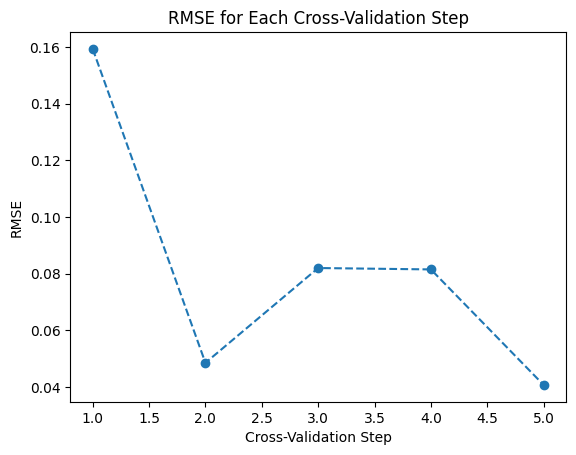

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Define Random Forest model with simple hyperparameters
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Perform cross-validation (using 5 folds) and calculate the negative mean squared error
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Convert negative MSE to RMSE
cv_rmse_scores = (-cv_scores) ** 0.5

# Print results
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())

# Plot RMSE for each cross-validation step
plt.plot(range(1, len(cv_rmse_scores) + 1), cv_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('RMSE')
plt.title('RMSE for Each Cross-Validation Step')
plt.show()


Test Mean Squared Error: 0.0005621910411235078
Test Mean Absolute Error: 0.009641898432233856
Validation Mean Squared Error: 0.0005296438580920184
Validation Mean Absolute Error: 0.00924768255304697


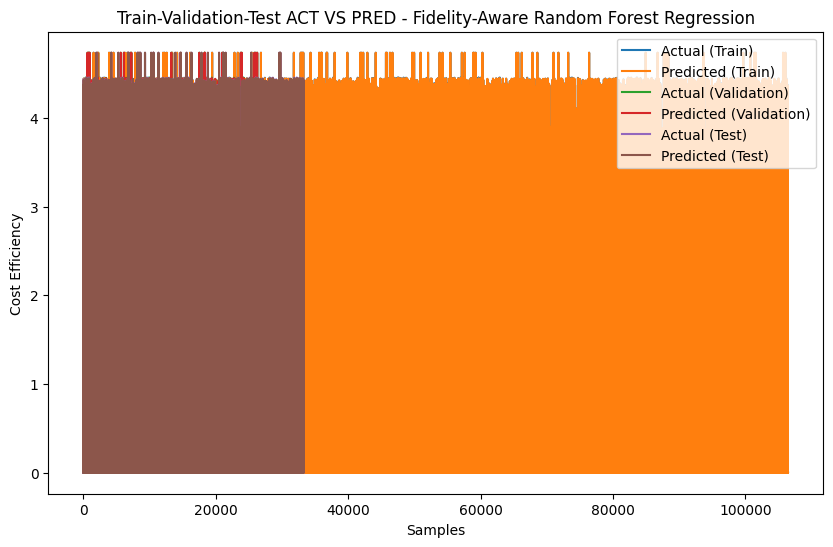

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define Fidelity Levels (Example: Assign higher weights to high-fidelity data)
def assign_fidelity_weights(X_train):
    # Assuming higher fidelity for certain samples (you can change this logic)
    weights = np.ones(len(X_train))
    weights[: len(X_train) // 3] *= 0.5  # Low-fidelity samples (Lower weight)
    weights[len(X_train) // 3 : 2 * len(X_train) // 3] *= 1.0  # Medium-fidelity samples
    weights[2 * len(X_train) // 3 :] *= 2.0  # High-fidelity samples (Higher weight)
    return weights

# Assign fidelity weights to the training data
fidelity_weights = assign_fidelity_weights(X_train)

# Define Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Fit the Random Forest model with fidelity weights
rf_model.fit(X_train, y_train, sample_weight=fidelity_weights)

# Predict on the test set
y_pred_test = rf_model.predict(X_test)

# Calculate evaluation metrics (Test Set)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

# Print evaluation metrics
print("Test Mean Squared Error:", mse_test)
print("Test Mean Absolute Error:", mae_test)

# Predict on the validation set
y_pred_val = rf_model.predict(X_val)

# Calculate evaluation metrics (Validation Set)
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)

# Print validation metrics
print("Validation Mean Squared Error:", mse_val)
print("Validation Mean Absolute Error:", mae_val)

# Predict on the training set
y_pred_train = rf_model.predict(X_train)

# Plot Train-Validation-Test Predictions
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train)), y_train, label='Actual (Train)')
plt.plot(range(len(y_pred_train)), y_pred_train, label='Predicted (Train)')
plt.plot(range(len(y_val)), y_val, label='Actual (Validation)')
plt.plot(range(len(y_pred_val)), y_pred_val, label='Predicted (Validation)')
plt.plot(range(len(y_test)), y_test, label='Actual (Test)')
plt.plot(range(len(y_pred_test)), y_pred_test, label='Predicted (Test)')
plt.xlabel('Samples')
plt.ylabel('Cost Efficiency')  # Change based on your actual target variable
plt.title('Train-Validation-Test ACT VS PRED - Fidelity-Aware Random Forest Regression')
plt.legend()
plt.show()
